# Exploration de l'environnement `highway`

## Introduction

Ce notebook a pour objectif d'explorer l'environnement `highway`afin de se familiariser avec l'API de Gymnasium.

## Initialisation de l'environnement

Espace d'actions : Discrete(5)
Forme de l'observation (V x F) : (5, 5)
Info : {'speed': 25.0, 'crashed': False, 'action': np.int64(0), 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 1.0, 'high_speed_reward': np.float64(0.5), 'on_road_reward': 1.0}}
<class 'numpy.ndarray'> (150, 600, 3)


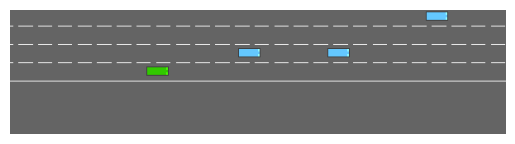

In [19]:
%matplotlib inline

import gymnasium as gym
import highway_env
import matplotlib.pyplot as plt

env = gym.make("highway-v0", render_mode="rgb_array")
obs, info = env.reset()

print("Espace d'actions :", env.action_space)
print("Forme de l'observation (V x F) :", obs.shape)
print("Info :", info)

frame = env.render()
print(type(frame), getattr(frame, "shape", None))
plt.imshow(frame)
plt.axis("off")
plt.show()

## Espaces d'actions

La correspondance entre indices et actions est donnée par `ACTIONS_ALL`.

In [9]:
print("Action space :", env.action_space)
print("Nombre d'actions :", env.action_space.n)

# Inspection du type d'actions utilisé par highway-env
action_type = env.unwrapped.action_type

print("Type d'action :", type(action_type))
print("Mapping index -> action :")
for idx, label in action_type.ACTIONS_ALL.items():
    print(f"{idx} -> {label}")

Action space : Discrete(5)
Nombre d'actions : 5
Type d'action : <class 'highway_env.envs.common.action.DiscreteMetaAction'>
Mapping index -> action :
0 -> LANE_LEFT
1 -> IDLE
2 -> LANE_RIGHT
3 -> FASTER
4 -> SLOWER


## Observations

L'espace des observations pour la configuration par défaut `KinematicObservation` est une array numpy de dimension **VxF** où :

- **V** est le nombre de véhicules ;
- et **F** est le nombre de `features`.

Dans la configuration par défaut de `highway-v0`, nous avons un espace d'observation de dimension **(5x5)**.

Pour les 5 features, nous avons :

| Feature      | Description |
| ----------- | ----------- |
| $presence$| Indicateur 0/1 (souvent codé en float) qui dit si la ligne correspond à un vrai véhicule ou à du padding.|
| $x$| Position longitudinale du véhicule (le long de la route)|
| $y$| Position latérale du véhicule (liée à la voie)|
| $v_{x}$| Vitesse longitudinale|
| $v_{y}$| Vitesse latérale|

> Le premier véhicule (`idx =0`) est celui de l'agent apprenant.

In [10]:
print("Observation complète :")
print(obs)

ego = obs[0]
neighbors = obs[1:]

print("Ego vehicle (ligne 0) :")
print(ego)

print("\nVéhicules voisins :")
print(neighbors)

Observation complète :
[[ 1.          0.9074219   0.25        0.3125      0.        ]
 [ 1.          0.10963486  0.5        -0.0270457   0.        ]
 [ 1.          0.20375383  0.25       -0.04500837  0.        ]
 [ 1.          0.29866678  0.         -0.04227867  0.        ]
 [ 1.          0.3946682  -0.25       -0.04851839  0.        ]]
Ego vehicle (ligne 0) :
[1.        0.9074219 0.25      0.3125    0.       ]

Véhicules voisins :
[[ 1.          0.10963486  0.5        -0.0270457   0.        ]
 [ 1.          0.20375383  0.25       -0.04500837  0.        ]
 [ 1.          0.29866678  0.         -0.04227867  0.        ]
 [ 1.          0.3946682  -0.25       -0.04851839  0.        ]]


### Effet de l'action `0 : LANE_LEFT`

In [18]:
obs, info = env.reset()

print("Ego avant action :", obs[0])
print("Informations initiales :", info)

# Appliquer plusieurs fois FASTER (action 3)
for i in range(3):
    obs, reward, terminated, truncated, info = env.step(0)

print("Ego après actions :", obs[0])
print("Informations finales :", info)

Ego avant action : [1.        0.8817887 0.5       0.3125    0.       ]
Informations initiales : {'speed': 25.0, 'crashed': False, 'action': np.int64(3), 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': np.float64(0.5), 'on_road_reward': 1.0}}
Ego après actions : [ 1.          1.          0.00307083  0.31249386 -0.00195832]
Informations finales : {'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.4999509110612042), 'on_road_reward': 1.0}}


### Effet de l'action `3 : FASTER`

In [15]:
obs, info = env.reset()

print("Ego avant action :", obs[0])
print("Vitesse initiale :", info.get("speed"))

# Appliquer plusieurs fois FASTER (action 3)
for i in range(3):
    obs, reward, terminated, truncated, info = env.step(3)

print("Ego après accélération :", obs[0])
print("Vitesse après accélerations successives :", info.get("speed"))

Ego avant action : [1.        0.8864591 0.5       0.3125    0.       ]
Vitesse initiale : 25.0
Ego après accélération : [1.        1.        0.5       0.3746881 0.       ]
Vitesse après accélerations successives : 29.975047934935745


> Après plusieurs actions FASTER, la position longitudinale $x$ et la vitesse longitudinale $v_{x}$ augmentent, tandis que la position latérale $y$ et $v_{y}$  restent stables.